# Assignment 1 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_A1_Q3.ipynb`.

## 1.3.0 Background about the dataset

TLDR: You have 25 independent variables (`x1, x2, x3, ... , x25`) type: `float` for each data point. You can use a linear combination of these 25 independent variables to predict the y (dependent variable) of each data point.

In [2]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from prettytable import PrettyTable

In [3]:
train_data = list()
with open('train_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                       float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        train_data.append(data_point)
        
# each point in x_train has 25 values - 1 for each feature
x_train = [x[0] for x in train_data]
# each point in y_train has 1 value - the 'y' of the molecule
y_train = [x[1] for x in train_data]


test_data = list()
with open('test_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                        float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        test_data.append(data_point)

x_test = [x[0] for x in test_data]
y_test = [x[1] for x in test_data]

### 1.3.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

1.3.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

1.3.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

1.3.2.3 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

1.2.1.4 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

In [4]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train=np.vstack((np.ones((x_train.shape[0],)),x_train.T)).T
x_test=np.vstack((np.ones((x_test.shape[0],)),x_test.T)).T


<!-- your answer to 1.3.1.1 -->
`ANSWER 1.3.1.1`

  Linear regression assumes a linear relationship between the independent variables(X1-X25) and the single dependent variable (y).

  More specifically, that output (y) can be calculated from a linear combination of the independent variables

  In simple linear regression we can use statistics on the training data to estimate the coefficients required by the model to make predictions on new data.
The line for a simple linear regression model can be written as:

`y = b0 + b1 * x`

where b0 and b1 are the coefficients we must estimate from the training data, here b0 = bias and b1 = weights vector for each feature.

Once the coefficients are known, we can use this equation to estimate output values for y given new input examples of x.

We can get the coefficients by passing different learning rate and for each learning rate we will get different coefficients and after putting it in the above equation we will get different losses for test data and for whichever weight we get minimum loss we will select those coefficients.

In [5]:
x_train[0]

array([ 1.        , -0.9996463 ,  0.99929273, -0.99893928,  0.99858596,
       -0.99823276,  0.99787969, -0.99752674,  0.99717392, -0.99682122,
        0.99646865, -0.9961162 ,  0.99576388, -0.99541168,  0.9950596 ,
       -0.99470765,  0.99435583, -0.99400413,  0.99365255, -0.9933011 ,
        0.99294977, -0.99259856,  0.99224748, -0.99189653,  0.9915457 ,
       -0.99119499])

In [6]:
# 1.3.1.2
# implement Linear Regression
def LinearRegression(x_train,y_train,learning_rate,iteration):
  n=y_train.size
  theta=np.zeros((x_train.shape[1],1))
  y_train=y_train.reshape((y_train.shape[0],1))
  for itr in range(iteration):
    y_pred=np.dot(x_train,theta)
    # cost=(1/(n))*np.sum(np.square(y_pred-y_train))
    d_theta=(1/n)*np.dot(x_train.T,y_pred-y_train)
    theta=theta-learning_rate*d_theta
    # if(itr%1000 == 0):
    #   print(cost)  
  return theta

In [8]:
# 1.3.2.3
# try with different learning rates and choose the best one
iteration=10000
optimal_lr=0
min_MSE=1
learning_rates=[1,0.75,0.5,0.25,0.1,0.075,0.05,0.03,0.02,0.01,0.00875]
myTable = PrettyTable(["learning rate", "MSE"])
for lrn_rate in learning_rates:
  theta=LinearRegression(x_train,y_train,lrn_rate,iteration)
  y_pred=np.dot(x_test,theta)
  y_test = y_test.reshape((y_test.shape[0],1))
  mse=(1/x_test.shape[0])*np.sum(np.square(y_pred-y_test))
  if min_MSE>mse:
    min_MSE=mse
    optimal_lr=lrn_rate
  myTable.add_row([lrn_rate, mse])
  
print(myTable)

+---------------+----------------------+
| learning rate |         MSE          |
+---------------+----------------------+
|       1       | 0.15546751299125572  |
|      0.75     | 0.12668241078539283  |
|      0.5      | 0.07569830486530749  |
|      0.25     | 0.01532033601794226  |
|      0.1      | 0.006584420507792627 |
|     0.075     | 0.009005289268607889 |
|      0.05     | 0.00815667198584769  |
|      0.03     | 0.001574128737249006 |
|      0.02     | 0.012797025041409943 |
|      0.01     | 0.08974534864763449  |
|    0.00875    | 0.10382646449441899  |
+---------------+----------------------+


In [9]:
iteration=10000
learning_rate=optimal_lr
theta=LinearRegression(x_train,y_train,learning_rate,iteration)
y_pred=np.dot(x_test,theta)
y_test = y_test.reshape((y_test.shape[0],1))
mse=(1/x_test.shape[0])*np.sum(np.square(y_pred-y_test))
mse

0.001574128737249006

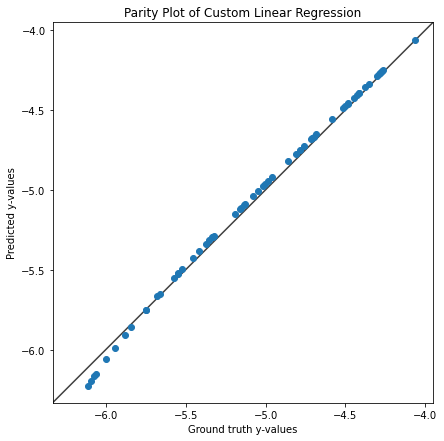

In [10]:
# 1.3.1.4
# Get the predictions of x_test into `y_pred`

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

### 1.3.2 Implement Ridge Regression

1.3.2.1 Explain Ridge regression briefly in 1-2 lines.

1.3.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do?

1.3.2.3 How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

1.3.2.4 Make a Parity Plot of Ridge Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.2.1 -->
`1.3.2.1 Answer`

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity.

   This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values. 

In [15]:
# 1.3.2.2
# you should not have imported sklearn before this point
import sklearn
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from prettytable import PrettyTable
  
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Alpha Value", "RMSE"])
optimal_alpha=0
min_MSE=1
alpha_values=[1,0.75,0.5,0.25,0.1,0.075,0.05,0.03,0.02,0.01,0.00875]
for alpha in alpha_values:
  ridge = Ridge(alpha)
  ridge.fit(x_train, y_train)             # Fit a ridge regression on the training data
  pred = ridge.predict(x_test)           # Use this model to predict the test data
  #print(pd.Series(ridge2.coef_, index = x_train.columns)) # Print coefficients
  rmse=np.sqrt(mean_squared_error(y_test, pred))
  if min_MSE>rmse:
    min_MSE=rmse
    optimal_alpha=alpha
  myTable.add_row([alpha, rmse])
  
print(myTable)
# implement Ridge regression and make a table where you explore the effect of different values of `alpha`

+-------------+---------------------+
| Alpha Value |         RMSE        |
+-------------+---------------------+
|      1      | 0.07087132528642193 |
|     0.75    | 0.06466111998220395 |
|     0.5     |  0.0604991995665746 |
|     0.25    | 0.06275940342847698 |
|     0.1     | 0.10934861996811106 |
|    0.075    | 0.13966189504992277 |
|     0.05    |  0.1883462356986595 |
|     0.03    | 0.24719544635551557 |
|     0.02    | 0.28284048303599996 |
|     0.01    |  0.3073870798290123 |
|   0.00875   | 0.30616310853822143 |
+-------------+---------------------+


<!-- Your answer to 1.3.2.3 -->
`1.3.2.3 Answer`

Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model. This modification is done by adding a penalty parameter that is equivalent to the square of the magnitude of the coefficients.

`Loss function = OLS + alpha * summation (squared coefficient values)`

In the above loss function, alpha is the parameter we need to select. A low alpha value can lead to over-fitting, whereas a high alpha value can lead to under-fitting.

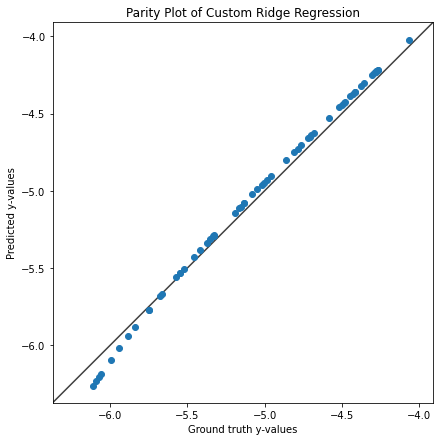

In [16]:
# 1.3.2.4

fig, ax = plt.subplots(figsize=(7,7))
ridge = Ridge(optimal_alpha)
ridge.fit(x_train, y_train)             # Fit a ridge regression on the training data
y_pred = ridge.predict(x_test)  
ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Ridge Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

### 1.3.3 Implement Lasso Regression
1.3.3.1 Explain Lasso regression briefly in 1-2 lines.

1.3.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha.

1.3.3.3 What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

1.3.3.4 Make a Parity Plot of Lasso Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.3.1 -->
`1.3.3.1 Answer`

Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean.

In [19]:
# 1.3.3.2
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`
# lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000)
# lassocv.fit(x_train, y_train)
myTable = PrettyTable(["Alpha Value", "RMSE"])
optimal_alpha=0
min_MSE=1
alpha_values=[1,0.75,0.5,0.25,0.1,0.075,0.05,0.03,0.02,0.01,0.00875]
for alpha in alpha_values:
  lasso = Lasso(max_iter = 10000)
  lasso.set_params(alpha=alpha)
  lasso.fit(x_train, y_train)
  rmse=mean_squared_error(y_test, lasso.predict(x_test))
  if min_MSE>rmse:
    min_MSE=rmse
    optimal_alpha=alpha
  myTable.add_row([alpha, rmse])
  
print(myTable)

+-------------+-----------------------+
| Alpha Value |          RMSE         |
+-------------+-----------------------+
|      1      |   18.232285742914325  |
|     0.75    |   10.229047388221325  |
|     0.5     |   4.523047034072112   |
|     0.25    |    1.11428468046669   |
|     0.1     |  0.17170150856445557  |
|    0.075    |  0.09500764326644891  |
|     0.05    |  0.04128615797388026  |
|     0.03    |  0.014849083343740656 |
|     0.02    |  0.007143917229976103 |
|     0.01    | 0.0017994532227576011 |
|   0.00875   | 0.0008918582424448247 |
+-------------+-----------------------+


<!-- Your answer to 1.3.3.3 -->
`1.3.3.3 Answer`

  Lasso regression, or the Least Absolute Shrinkage and Selection Operator, is also a modification of linear regression. In Lasso, the loss function is modified to minimize the complexity of the model by limiting the sum of the absolute values of the model coefficients (also called the l1-norm).

The loss function for Lasso Regression can be expressed as below:

```Loss function = OLS + alpha * summation (absolute values of the magnitude of the coefficients)```

In the above loss function, alpha is the penalty parameter we need to select. Using an l1 norm constraint forces some weight values to zero to allow other coefficients to take non-zero values.

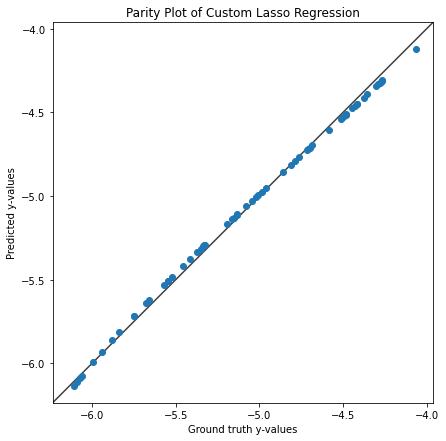

In [20]:
# 1.3.3.4
fig, ax = plt.subplots(figsize=(7,7)) 
lasso = Lasso(max_iter = 10000)
lasso.set_params(alpha=optimal_alpha)
lasso.fit(x_train, y_train)
y_pred=lasso.predict(x_test)
ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Lasso Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()